#üìå Extracci√≥n

In [ ]:
import pandas as pd
import requests
import json
url = 'https://github.com/ingridcristh/challenge2-data-science-LATAM/raw/refs/heads/main/TelecomX_Data.json'
pd.read_json(url)
df = pd.read_json(url)
df.head(5)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transformaci√≥n

In [ ]:
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [ ]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Unir todas las columnas normalizadas con el dataframe original
df_flat = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                     customer_df, phone_df, internet_df, account_df], axis=1)


df_flat.duplicated().sum()
df_flat.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [ ]:
df.isnull().sum()

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [ ]:
df_flat.to_csv('telecomx_data_limpio.csv', index=False)

In [ ]:
#from google.colab import files
#files.download('telecomx_data_limpio.csv')

NameError: name 'files' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

df = pd.read_csv('telecomx_data_limpio.csv')
df.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [ ]:
df.shape#filasxcolumnas

(7267, 21)

In [ ]:
df.info

<bound method DataFrame.info of       customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]>

In [ ]:
df.isnull().sum()

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64

In [ ]:
df = df.dropna(subset=['Churn'])
df['Churn'].isna().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColumna: {col}")
        print(df[col].value_counts(dropna=False))


Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64

Columna: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Columna: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Columna: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Columna: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3498
Yes                  

In [ ]:
df.describe()

SeniorCitizen       tenure  Charges.Monthly
count    7043.000000  7043.000000      7043.000000
mean        0.162147    32.371149        64.761692
std         0.368612    24.559481        30.090047
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.500000
50%         0.000000    29.000000        70.350000
75%         0.000000    55.000000        89.850000
max         1.000000    72.000000       118.750000

In [ ]:

df.loc[:, 'Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].isnull().sum()
df = df.dropna(subset=['Charges.Total'])
mean_total = df['Charges.Total'].mean()
df['Charges.Total'] = df['Charges.Total'].fillna(mean_total)

/tmp/ipython-input-3415844556.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Charges.Total'] = df['Charges.Total'].fillna(mean_total)


In [ ]:
for col in df.select_dtypes(include='object').columns:
    df.loc[:, col] = df[col].str.strip().str.lower()

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn: ['no' 'yes']
gender: ['female' 'male']
Partner: ['yes' 'no']
Dependents: ['yes' 'no']
PhoneService: ['yes' 'no']
MultipleLines: ['no' 'yes' 'no phone service']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes' 'no internet service']
OnlineBackup: ['yes' 'no' 'no internet service']
DeviceProtection: ['no' 'yes' 'no internet service']
TechSupport: ['yes' 'no' 'no internet service']
StreamingTV: ['yes' 'no' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']
Contract: ['one year' 'month-to-month' 'two year']
PaperlessBilling: ['yes' 'no']
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


In [ ]:
df.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

In [ ]:
duplicados = df[df.duplicated()]
print(f"Duplicados encontrados: {len(duplicados)}")

Duplicados encontrados: 0


Buscar columnas con muchos valores √∫nicos pero tipo texto (posibles errores)

In [ ]:
for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].nunique()
    if unique_vals > 20:
        print(f" Posible error en: {col} (tiene {unique_vals} valores √∫nicos)") #customerID requiere los valores unicos

 Posible error en: customerID (tiene 7032 valores √∫nicos)


In [ ]:

df.set_index('customerID', inplace=True)

In [ ]:
df['Charges.Total'].unique()[:10]

array([ 593.3 ,  542.4 ,  280.85, 1237.85,  267.4 ,  571.45, 7904.25,
       5377.8 ,  340.35, 5957.9 ])

In [ ]:
df.loc[:, 'Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [ ]:
df['Charges.Total'].dtype

dtype('float64')

In [ ]:
for col in df.select_dtypes(include='object').columns:
    unique_vals = df[col].nunique()
    if unique_vals > 20:
        print(f" Posible error en: {col} (tiene {unique_vals} valores √∫nicos)")

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()

churn  gender  seniorcitizen partner dependents  tenure  \
customerID                                                           
0002-orfbo    no  female              0     yes        yes       9   
0003-mknfe    no    male              0      no         no       9   
0004-tlhlj   yes    male              0      no         no       4   
0011-igkff   yes    male              1     yes         no      13   
0013-exchz   yes  female              1     yes         no       3   

           phoneservice multiplelines internetservice onlinesecurity  \
customerID                                                             
0002-orfbo          yes            no             dsl             no   
0003-mknfe          yes           yes             dsl             no   
0004-tlhlj          yes            no     fiber optic             no   
0011-igkff          yes            no     fiber optic             no   
0013-exchz          yes            no     fiber optic             no   

           onlinebackup deviceprotection techsupport streamingtv  \
customerID                                                         
0002-orfbo          yes               no         yes         yes   
0003-mknfe           no               no          no          no   
0004-tlhlj           no              yes          no          no   
0011-igkff          yes              yes          no         yes   
0013-exchz           no               no         yes         yes   

           streamingmovies        contract paperlessbilling     paymentmethod  \
customerID                                                                      
0002-orfbo              no        one year              yes      mailed check   
0003-mknfe             yes  month-to-month               no      mailed check   
0004-tlhlj              no  month-to-month              yes  electronic check   
0011-igkff             yes  month-to-month              yes  electronic check   
0013-exchz              no  month-to-month              yes      mailed check   

            charges.monthly  charges.total  
customerID                                  
0002-orfbo             65.6         593.30  
0003-mknfe             59.9         542.40  
0004-tlhlj             73.9         280.85  
0011-igkff             98.0        1237.85  
0013-exchz             83.9         267.40

**Creaci√≥n de columna cuentas diarias en el dataframe: Cuentas_Diarias, que representa el gasto promedio diario de un cliente.**

Limpiar nombres de columnas:

In [ ]:
df.columns.tolist()

['churn',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'charges.monthly',
 'charges.total']

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\t', '')

In [ ]:
df.loc[:, 'charges.monthly'] = pd.to_numeric(df['charges.monthly'], errors='coerce')


In [ ]:
df.loc[:, 'cuentas_diarias'] = df['charges.monthly'] / 30
df[['charges.monthly', 'cuentas_diarias']].head()

charges.monthly  cuentas_diarias
customerID                                  
0002-orfbo             65.6         2.186667
0003-mknfe             59.9         1.996667
0004-tlhlj             73.9         2.463333
0011-igkff             98.0         3.266667
0013-exchz             83.9         2.796667

**Estandarizar datos binarios.**

In [ ]:
df.isnull().sum()

churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
cuentas_diarias     0
dtype: int64

**La columna charges.total presenta datos nulos porque representa que son clientes nuevos los que aun no han pagado nada.**
**Se reemplaza entonces esos datos nulos con 0.**

In [ ]:
df['charges.total'] = df['charges.total'].fillna(0)
df.isnull().sum()

churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
cuentas_diarias     0
dtype: int64

In [ ]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 2:
        print(f"Columna binaria: {col} - Valores: {df[col].unique()}")

Columna binaria: churn - Valores: ['no' 'yes']
Columna binaria: gender - Valores: ['female' 'male']
Columna binaria: partner - Valores: ['yes' 'no']
Columna binaria: dependents - Valores: ['yes' 'no']
Columna binaria: phoneservice - Valores: ['yes' 'no']
Columna binaria: paperlessbilling - Valores: ['yes' 'no']


In [ ]:
bin_map = {
    'yes': 1, 'no': 0,
    'male': 1, 'female': 0,
}

In [ ]:
for col in df.columns:
    if df[col].nunique() == 2 and df[col].dtype == 'object':
        df.loc[:, col] = df[col].str.strip().str.lower().map(bin_map)

In [ ]:
df.head()

churn gender  seniorcitizen partner dependents  tenure  \
customerID                                                          
0002-orfbo     0      0              0       1          1       9   
0003-mknfe     0      1              0       0          0       9   
0004-tlhlj     1      1              0       0          0       4   
0011-igkff     1      1              1       1          0      13   
0013-exchz     1      0              1       1          0       3   

           phoneservice multiplelines internetservice onlinesecurity  ...  \
customerID                                                            ...   
0002-orfbo            1            no             dsl             no  ...   
0003-mknfe            1           yes             dsl             no  ...   
0004-tlhlj            1            no     fiber optic             no  ...   
0011-igkff            1            no     fiber optic             no  ...   
0013-exchz            1            no     fiber optic             no  ...   

           deviceprotection techsupport streamingtv streamingmovies  \
customerID                                                            
0002-orfbo               no         yes         yes              no   
0003-mknfe               no          no          no             yes   
0004-tlhlj              yes          no          no              no   
0011-igkff              yes          no         yes             yes   
0013-exchz               no         yes         yes              no   

                  contract paperlessbilling     paymentmethod charges.monthly  \
customerID                                                                      
0002-orfbo        one year                1      mailed check            65.6   
0003-mknfe  month-to-month                0      mailed check            59.9   
0004-tlhlj  month-to-month                1  electronic check            73.9   
0011-igkff  month-to-month                1  electronic check            98.0   
0013-exchz  month-to-month                1      mailed check            83.9   

            charges.total  cuentas_diarias  
customerID                                  
0002-orfbo         593.30         2.186667  
0003-mknfe         542.40         1.996667  
0004-tlhlj         280.85         2.463333  
0011-igkff        1237.85         3.266667  
0013-exchz         267.40         2.796667  

[5 rows x 21 columns]

#üìä Carga y an√°lisis

In [ ]:
df.describe()

seniorcitizen       tenure  charges.monthly  charges.total  \
count    7032.000000  7032.000000      7032.000000    7032.000000   
mean        0.162400    32.421786        64.798208    2283.300441   
std         0.368844    24.545260        30.085974    2266.771362   
min         0.000000     1.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.587500     401.450000   
50%         0.000000    29.000000        70.350000    1397.475000   
75%         0.000000    55.000000        89.862500    3794.737500   
max         1.000000    72.000000       118.750000    8684.800000   

       cuentas_diarias  
count      7032.000000  
mean          2.159940  
std           1.002866  
min           0.608333  
25%           1.186250  
50%           2.345000  
75%           2.995417  
max           3.958333

In [ ]:
df.describe(include='all')#variables num√©ricas

churn  gender  seniorcitizen  partner  dependents       tenure  \
count   7032.0  7032.0    7032.000000   7032.0      7032.0  7032.000000   
unique     2.0     2.0            NaN      2.0         2.0          NaN   
top        0.0     1.0            NaN      0.0         0.0          NaN   
freq    5163.0  3549.0            NaN   3639.0      4933.0          NaN   
mean       NaN     NaN       0.162400      NaN         NaN    32.421786   
std        NaN     NaN       0.368844      NaN         NaN    24.545260   
min        NaN     NaN       0.000000      NaN         NaN     1.000000   
25%        NaN     NaN       0.000000      NaN         NaN     9.000000   
50%        NaN     NaN       0.000000      NaN         NaN    29.000000   
75%        NaN     NaN       0.000000      NaN         NaN    55.000000   
max        NaN     NaN       1.000000      NaN         NaN    72.000000   

        phoneservice multiplelines internetservice onlinesecurity  ...  \
count         7032.0          7032            7032           7032  ...   
unique           2.0             3               3              3  ...   
top              1.0            no     fiber optic             no  ...   
freq          6352.0          3385            3096           3497  ...   
mean             NaN           NaN             NaN            NaN  ...   
std              NaN           NaN             NaN            NaN  ...   
min              NaN           NaN             NaN            NaN  ...   
25%              NaN           NaN             NaN            NaN  ...   
50%              NaN           NaN             NaN            NaN  ...   
75%              NaN           NaN             NaN            NaN  ...   
max              NaN           NaN             NaN            NaN  ...   

       deviceprotection techsupport streamingtv streamingmovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  no          no          no              no   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              contract paperlessbilling     paymentmethod charges.monthly  \
count             7032           7032.0              7032     7032.000000   
unique               3              2.0                 4             NaN   
top     month-to-month              1.0  electronic check             NaN   
freq              3875           4168.0              2365             NaN   
mean               NaN              NaN               NaN       64.798208   
std                NaN              NaN               NaN       30.085974   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.587500   
50%                NaN              NaN               NaN       70.350000   
75%                NaN              NaN               NaN       89.862500   
max                NaN              NaN               NaN      118.750000   

        charges.total  cuentas_diarias  
count     7032.000000      7032.000000  
unique            NaN              NaN  
top               NaN              NaN  
freq              NaN              NaN  
mean      2283.300441         2.159940  
std       2266.771362         1.002866  
min         18.800000         0.608333  
25%        401.450000         1.186250  
50%       1397.475000         2.345000  
75%       3794.737500         2.995417  
max       8684.800000         3.958333

In [ ]:
df.head()

churn gender  seniorcitizen partner dependents  tenure  \
customerID                                                          
0002-orfbo     0      0              0       1          1       9   
0003-mknfe     0      1              0       0          0       9   
0004-tlhlj     1      1              0       0          0       4   
0011-igkff     1      1              1       1          0      13   
0013-exchz     1      0              1       1          0       3   

           phoneservice multiplelines internetservice onlinesecurity  ...  \
customerID                                                            ...   
0002-orfbo            1            no             dsl             no  ...   
0003-mknfe            1           yes             dsl             no  ...   
0004-tlhlj            1            no     fiber optic             no  ...   
0011-igkff            1            no     fiber optic             no  ...   
0013-exchz            1            no     fiber optic             no  ...   

           deviceprotection techsupport streamingtv streamingmovies  \
customerID                                                            
0002-orfbo               no         yes         yes              no   
0003-mknfe               no          no          no             yes   
0004-tlhlj              yes          no          no              no   
0011-igkff              yes          no         yes             yes   
0013-exchz               no         yes         yes              no   

                  contract paperlessbilling     paymentmethod charges.monthly  \
customerID                                                                      
0002-orfbo        one year                1      mailed check            65.6   
0003-mknfe  month-to-month                0      mailed check            59.9   
0004-tlhlj  month-to-month                1  electronic check            73.9   
0011-igkff  month-to-month                1  electronic check            98.0   
0013-exchz  month-to-month                1      mailed check            83.9   

            charges.total  cuentas_diarias  
customerID                                  
0002-orfbo         593.30         2.186667  
0003-mknfe         542.40         1.996667  
0004-tlhlj         280.85         2.463333  
0011-igkff        1237.85         3.266667  
0013-exchz         267.40         2.796667  

[5 rows x 21 columns]

In [ ]:
df.isnull().sum()

churn               0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges.monthly     0
charges.total       0
cuentas_diarias     0
dtype: int64

**Variables cuantitativas.**

In [ ]:
cuantitativas = ['charges.total', 'charges.monthly', 'tenure', 'cuentas_diarias']
df[cuantitativas].describe()


charges.total  charges.monthly       tenure  cuentas_diarias
count    7032.000000      7032.000000  7032.000000      7032.000000
mean     2283.300441        64.798208    32.421786         2.159940
std      2266.771362        30.085974    24.545260         1.002866
min        18.800000        18.250000     1.000000         0.608333
25%       401.450000        35.587500     9.000000         1.186250
50%      1397.475000        70.350000    29.000000         2.345000
75%      3794.737500        89.862500    55.000000         2.995417
max      8684.800000       118.750000    72.000000         3.958333

In [ ]:
for col in cuantitativas:
    std = df[col].std()
    mean = df[col].mean()
    cv = (std / mean) * 100
    print(f" {col} - CV: {cv:.2f}%")


 charges.total - CV: 99.28%
 charges.monthly - CV: 46.43%
 tenure - CV: 75.71%
 cuentas_diarias - CV: 46.43%


In [ ]:
numericas = df.select_dtypes(include=['int64', 'float64'])

for col in numericas.columns:
    media = df[col].mean()
    mediana = df[col].median()
    std = df[col].std()
    minimo = df[col].min()
    maximo = df[col].max()
    rango = maximo - minimo
    coef_var = std / media if media != 0 else 0

    print(f" {col.upper()}")
    print(f"  Media: {media:.2f}")
    print(f"  Mediana: {mediana:.2f}")
    print(f"  Desviaci√≥n est√°ndar: {std:.2f}")
    print(f"  M√≠nimo: {minimo}")
    print(f"  M√°ximo: {maximo}")
    print(f"  Rango: {rango}")
    print(f"  Coef. Variaci√≥n: {coef_var:.2%}")
    print("-" * 40)

 SENIORCITIZEN
  Media: 0.16
  Mediana: 0.00
  Desviaci√≥n est√°ndar: 0.37
  M√≠nimo: 0
  M√°ximo: 1
  Rango: 1
  Coef. Variaci√≥n: 227.12%
----------------------------------------
 TENURE
  Media: 32.42
  Mediana: 29.00
  Desviaci√≥n est√°ndar: 24.55
  M√≠nimo: 1
  M√°ximo: 72
  Rango: 71
  Coef. Variaci√≥n: 75.71%
----------------------------------------
 CHARGES.MONTHLY
  Media: 64.80
  Mediana: 70.35
  Desviaci√≥n est√°ndar: 30.09
  M√≠nimo: 18.25
  M√°ximo: 118.75
  Rango: 100.5
  Coef. Variaci√≥n: 46.43%
----------------------------------------
 CHARGES.TOTAL
  Media: 2283.30
  Mediana: 1397.47
  Desviaci√≥n est√°ndar: 2266.77
  M√≠nimo: 18.8
  M√°ximo: 8684.8
  Rango: 8666.0
  Coef. Variaci√≥n: 99.28%
----------------------------------------
 CUENTAS_DIARIAS
  Media: 2.16
  Mediana: 2.34
  Desviaci√≥n est√°ndar: 1.00
  M√≠nimo: 0.6083333333333333
  M√°ximo: 3.9583333333333335
  Rango: 3.35
  Coef. Variaci√≥n: 46.43%
----------------------------------------


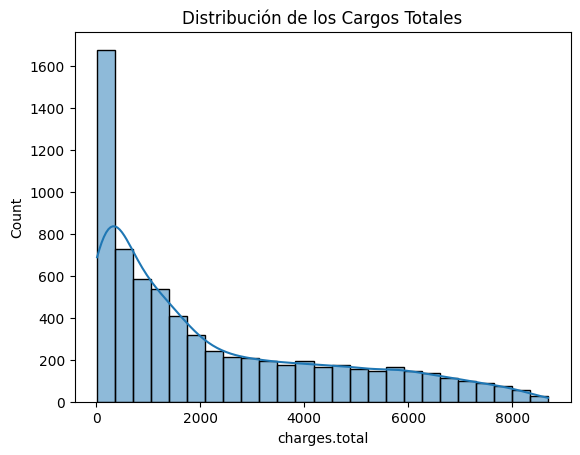

In [ ]:
sns.histplot(df['charges.total'], kde=True)
plt.title("Distribuci√≥n de los Cargos Totales")
plt.show()


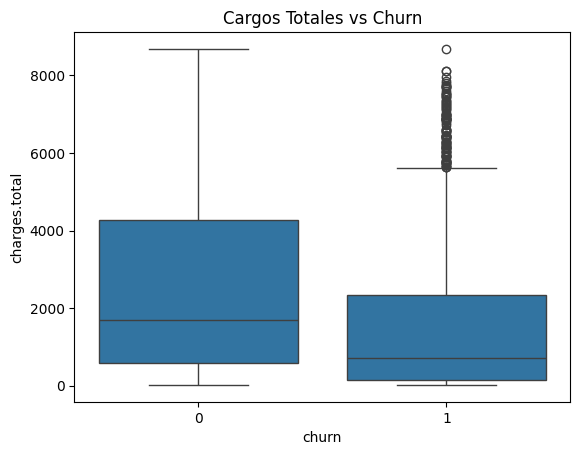

In [ ]:
sns.boxplot(data=df, x='churn', y='charges.total')
plt.title("Cargos Totales vs Churn")
plt.show()


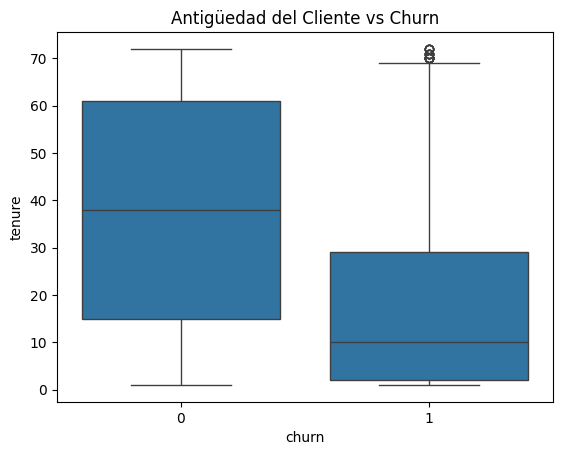

In [ ]:
sns.boxplot(data=df, x='churn', y='tenure')
plt.title("Antig√ºedad del Cliente vs Churn")
plt.show()


**Distribuciones categoricas**

**Variables binarias.**

In [ ]:
categoricas = df.select_dtypes(include='object')

for col in categoricas.columns:
    print(f"{col.upper()}")
    print(df[col].value_counts(normalize=True) * 100)  # % por categor√≠a
    print("-" * 40)

CHURN
churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64
----------------------------------------
GENDER
gender
1    50.469283
0    49.530717
Name: proportion, dtype: float64
----------------------------------------
PARTNER
partner
0    51.749147
1    48.250853
Name: proportion, dtype: float64
----------------------------------------
DEPENDENTS
dependents
0    70.150739
1    29.849261
Name: proportion, dtype: float64
----------------------------------------
PHONESERVICE
phoneservice
1    90.32992
0     9.67008
Name: proportion, dtype: float64
----------------------------------------
MULTIPLELINES
multiplelines
no                  48.137088
yes                 42.192833
no phone service     9.670080
Name: proportion, dtype: float64
----------------------------------------
INTERNETSERVICE
internetservice
fiber optic    44.027304
dsl            34.357224
no             21.615472
Name: proportion, dtype: float64
----------------------------------------
ONLINESECURITY
onli

**Distribuci√≥n de evasi√≥n.**

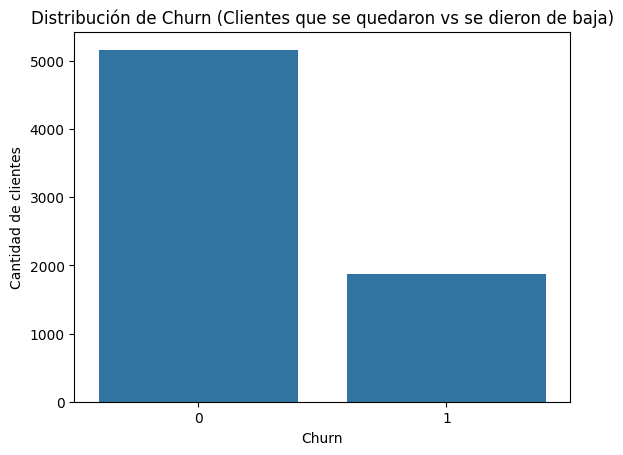

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gr√°fico de barras para la variable 'churn'
sns.countplot(data=df, x='churn')
plt.title('Distribuci√≥n de Churn (Clientes que se quedaron vs se dieron de baja)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()

**Correlaci√≥n de variables num√©ricas con Churn.**

In [ ]:
print(df['churn'].value_counts(dropna=False))
print(df['churn'].dtype)

churn
0    5163
1    1869
Name: count, dtype: int64
object


In [ ]:
df['churn'] = df['churn'].astype(int)

In [ ]:
df['churn'].dtype

dtype('int64')

/tmp/ipython-input-1764670307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


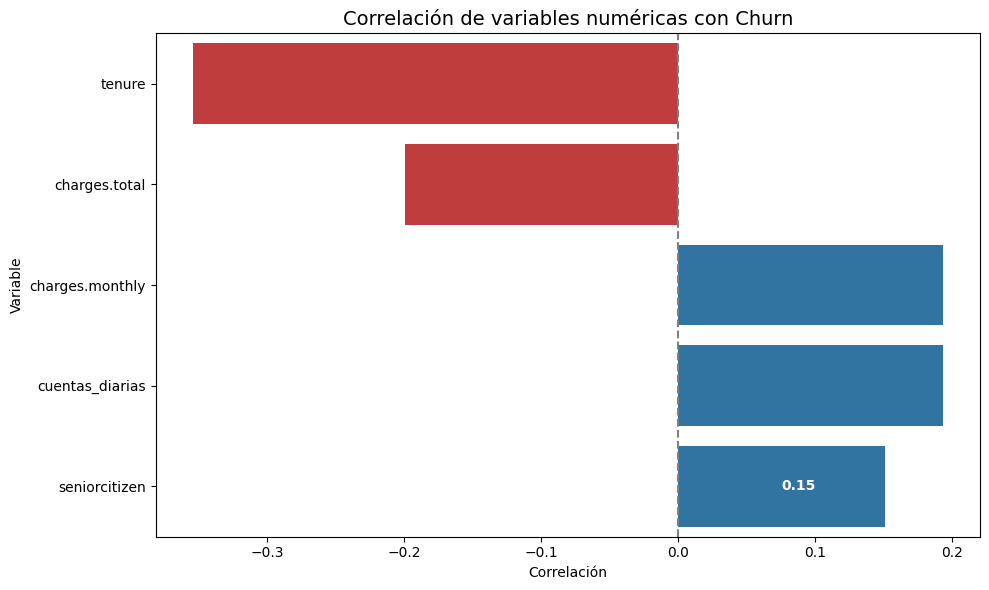

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlaciones
df['churn'] = df['churn'].astype(int)
num_vars = df.select_dtypes(include='number').columns.drop('churn')
correlations = df[num_vars].apply(lambda x: df['churn'].corr(x)).sort_values(key=abs, ascending=False)
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlaci√≥n']

# Definir colores: azul para positivo, rojo para negativo
colores = ['#1f77b4' if c >= 0 else '#d62728' for c in correlation_df['Correlaci√≥n']]

# Gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=correlation_df,
    x='Correlaci√≥n',
    y='Variable',
    palette=colores
)

# Agregar valores num√©ricos dentro de las barras
for i, (corr, var) in enumerate(zip(correlation_df['Correlaci√≥n'], correlation_df['Variable'])):
    x_pos = corr - 0.05 if corr > 0 else corr + 0.05
    align = 'right' if corr > 0 else 'left'

plt.text(x_pos, i, f"{corr:.2f}", color='white', va='center', ha=align, fontweight='bold')

# T√≠tulos y l√≠nea central
plt.title('Correlaci√≥n de variables num√©ricas con Churn', fontsize=14)
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


1. "Tenure" (antig√ºedad del cliente) tiene la mayor correlaci√≥n negativa con churn.
Correlaci√≥n negativa fuerte: a mayor tiempo que el cliente ha permanecido con la empresa, menor es la probabilidad de que se d√© de baja.

 Conclusi√≥n: La lealtad del cliente es un factor protector contra la cancelaci√≥n del servicio.

2. "Charges.Total" (gasto total) tiene una correlaci√≥n negativa significativa con churn.
Clientes que han invertido m√°s dinero en la empresa tienden a permanecer m√°s tiempo.

 Conclusi√≥n: Los clientes que han gastado m√°s probablemente est√©n m√°s satisfechos, o ven m√°s valor en el servicio, y por eso no se van f√°cilmente.

3. "Charges.Monthly" (cargo mensual) tiene una correlaci√≥n positiva con churn.
Clientes con cargos mensuales m√°s altos tienen mayor probabilidad de abandonar el servicio.

 Conclusi√≥n: Las tarifas elevadas podr√≠an ser una causa directa de cancelaci√≥n, especialmente si no se percibe valor equivalente.



**Correlaci√≥n variables categoricas churn.**

In [ ]:
import pandas as pd

# Lista de columnas categ√≥ricas (excluyendo churn si es categ√≥rica)
cat_cols = df.select_dtypes(include='object').columns.drop('churn', errors='ignore')

for col in cat_cols:
    print(f"\nüìä Variable: {col}")
    print(pd.crosstab(df[col], df['churn'], normalize='index') * 100)



üìä Variable: gender
churn           0          1
gender                      
0       73.040482  26.959518
1       73.795435  26.204565

üìä Variable: partner
churn            0          1
partner                      
0        67.023908  32.976092
1        80.282935  19.717065

üìä Variable: dependents
churn               0          1
dependents                      
0           68.720860  31.279140
1           84.468795  15.531205

üìä Variable: phoneservice
churn                 0          1
phoneservice                      
0             75.000000  25.000000
1             73.252519  26.747481

üìä Variable: multiplelines
churn                     0          1
multiplelines                         
no                74.918759  25.081241
no phone service  75.000000  25.000000
yes               71.351534  28.648466

üìä Variable: internetservice
churn                    0          1
internetservice                      
dsl              81.001656  18.998344
fiber optic      5

In [ ]:
from scipy.stats import chi2_contingency

for col in cat_cols:
    tabla = pd.crosstab(df[col], df['churn'])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{col}: p-value = {p:.4f}")


gender: p-value = 0.4905
partner: p-value = 0.0000
dependents: p-value = 0.0000
phoneservice: p-value = 0.3499
multiplelines: p-value = 0.0036
internetservice: p-value = 0.0000
onlinesecurity: p-value = 0.0000
onlinebackup: p-value = 0.0000
deviceprotection: p-value = 0.0000
techsupport: p-value = 0.0000
streamingtv: p-value = 0.0000
streamingmovies: p-value = 0.0000
contract: p-value = 0.0000
paperlessbilling: p-value = 0.0000
paymentmethod: p-value = 0.0000


1. contract	0.0000: Muy fuerte	El tipo de contrato tiene fuerte influencia: contratos mensuales probablemente tengan m√°s churn.
2. internetservice	0.0000: Muy fuerte	El tipo de internet (DSL, fibra, ninguno) afecta si el cliente se va.
3. techsupport	0.0000: Muy fuerte	No tener soporte t√©cnico se asocia con m√°s churn.
4. onlinesecurity	0.0000: Muy fuerte	Similar a lo anterior, no tener seguridad en l√≠nea puede influir.
5. paymentmethod	0.0000: Muy fuerte	El m√©todo de pago influye; posiblemente pagos autom√°ticos reduzcan churn.
6. paperlessbilling	0.0000: Fuerte	Facturaci√≥n electr√≥nica puede relacionarse con m√°s abandono.
7. partner, dependents	0.0000: Fuerte	Clientes con pareja o dependientes tienden a permanecer m√°s.
8. multiplelines	0.0036: Moderada	Tener m√∫ltiples l√≠neas puede influir ligeramente.

**1. Mapear aquellas variables que presentan mas de dos opciones.**

In [ ]:
# Generar variables dummies (one-hot) para todas las categ√≥ricas no binarias
df_dummies = pd.get_dummies(df, columns=['internetservice', 'contract', 'paymentmethod'], drop_first=True)


In [ ]:
df['churn'] = pd.to_numeric(df['churn'], errors='coerce')

# Filtrar columnas num√©ricas para calcular correlaci√≥n con churn
num_vars = df.select_dtypes(include='number').columns.drop('churn')
correlations = df[num_vars].apply(lambda x: df['churn'].corr(x)).sort_values(key=abs, ascending=False)

# Visualizar las correlaciones m√°s fuertes
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlaci√≥n']

# Mostrar
print(correlation_df.head(10))  # las 10 m√°s correlacionadas


          Variable  Correlaci√≥n
0           tenure    -0.354049
1    charges.total    -0.199484
2  charges.monthly     0.192858
3  cuentas_diarias     0.192858
4    seniorcitizen     0.150541


**2a. Revisar las columnas categ√≥ricas relevantes con Churn.**

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [ ]:
df.dtypes

customerID           object
churn                 int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
charges.monthly     float64
charges.total       float64
cuentas_diarias     float64
dtype: object

**2b. Verificar categor√≠as y corregir si hay errores.**

In [ ]:
for col in df.select_dtypes(include='object').columns:    print(f"{col}: {df[col].unique()}")

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
gender: [0 1]
partner: [1 0]
dependents: [1 0]
phoneservice: [1 0]
multiplelines: ['no' 'yes' 'no phone service']
internetservice: ['dsl' 'fiber optic' 'no']
onlinesecurity: ['no' 'yes' 'no internet service']
onlinebackup: ['yes' 'no' 'no internet service']
deviceprotection: ['no' 'yes' 'no internet service']
techsupport: ['yes' 'no' 'no internet service']
streamingtv: ['yes' 'no' 'no internet service']
streamingmovies: ['no' 'yes' 'no internet service']
contract: ['one year' 'month-to-month' 'two year']
paperlessbilling: [1 0]
paymentmethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


**3. Codificar variables categ√≥ricas Variables con m√°s de 2 categor√≠as
Usa One Hot Encoding:**

In [ ]:
cat_cols = ['internetservice', 'contract', 'paymentmethod']  # ajusta seg√∫n tus columnas

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
df.reset_index(inplace=True)

**4. Separar variables predictoras y objetivo.**


In [ ]:
print(df.columns)

Index(['index', 'customerID', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'paperlessbilling', 'charges.monthly',
       'charges.total', 'cuentas_diarias', 'internetservice_fiber optic',
       'internetservice_no', 'contract_one year', 'contract_two year',
       'paymentmethod_credit card (automatic)',
       'paymentmethod_electronic check', 'paymentmethod_mailed check'],
      dtype='object')


In [ ]:
X = df.drop(columns=['churn', 'customerID'])  # o cualquier otro ID
y = df['churn']

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop(columns='churn')  # o ['churn', 'customerID'] si corresponde
y = df['churn']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1400  154]
 [ 301  255]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1554
           1       0.62      0.46      0.53       556

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



 Clase 0: Clientes que no se dieron de baja
Precision = 0.82 ‚Üí De cada 100 clientes que el modelo dijo que no se iban, 82 realmente no se fueron.

Recall = 0.90 ‚Üí De cada 100 clientes que realmente no se fueron, el modelo detect√≥ correctamente a 90.

F1-score = 0.86 ‚Üí Buen equilibrio entre precisi√≥n y cobertura. Muy buen rendimiento.

Clase 1: Clientes que s√≠ se dieron de baja (churn)
Precision = 0.62 ‚Üí Solo el 62% de los que predijo como churn realmente se fueron.

Recall = 0.46 ‚Üí El modelo s√≥lo detect√≥ el 46% de los verdaderos casos de churn.

F1-score = 0.53 ‚Üí Rendimiento moderado. Mucho espacio para mejorar.

**4. Separar datos en train y test.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5. Caracteristicas en orden de mayor correlacion con Churn.:**

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

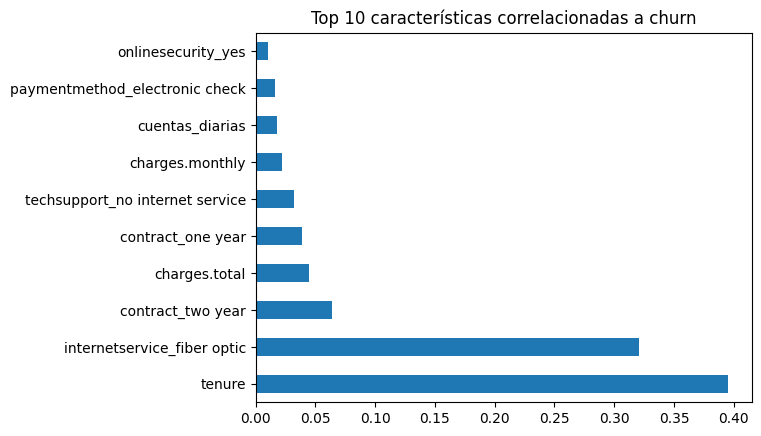

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 caracter√≠sticas correlacionadas a churn")
plt.show()


**Matriz de correlaci√≥n.**

In [ ]:
df_numericas = df.select_dtypes(include='number')

In [ ]:
matriz_corr = df_numericas.corr()

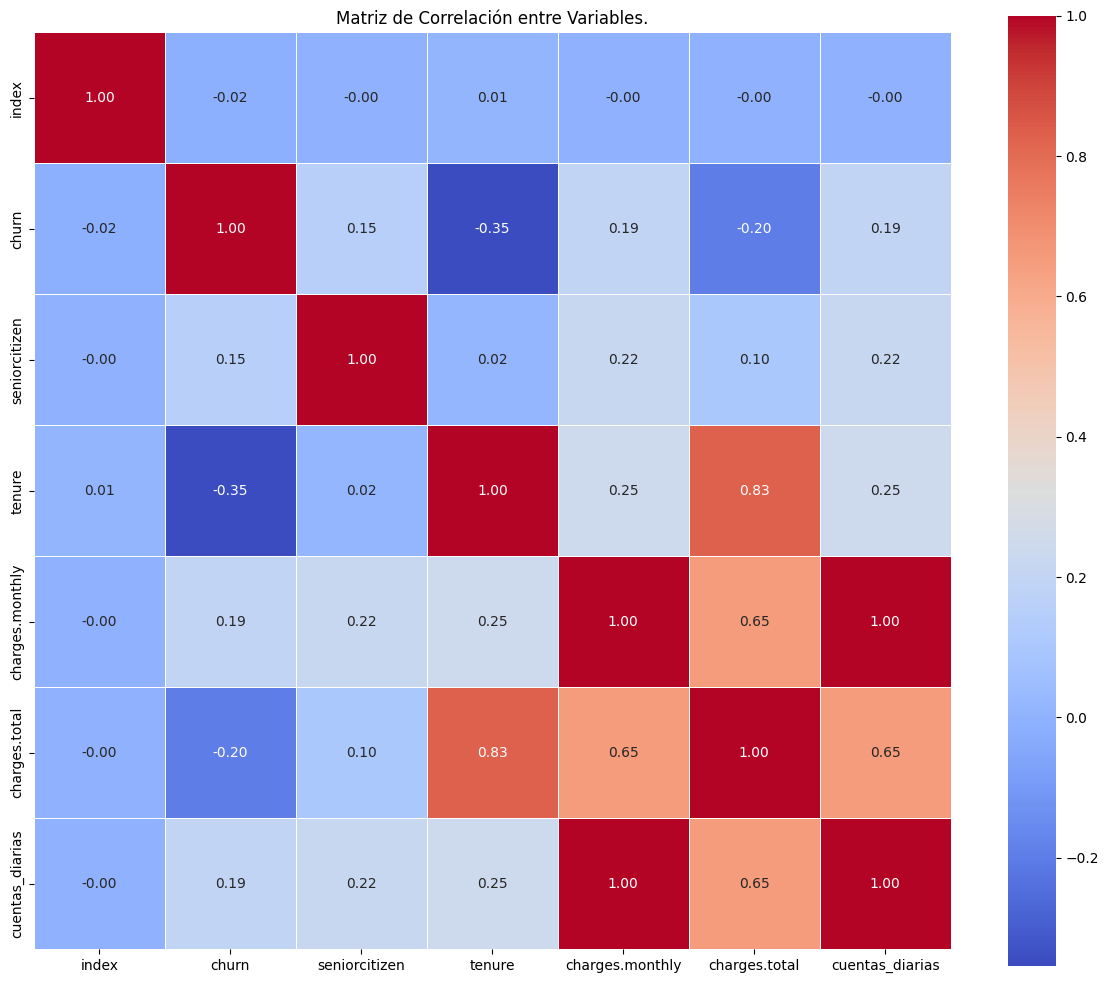

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Matriz de Correlaci√≥n entre Variables.")
plt.tight_layout()
plt.show()


**Extra:**

**!. Correlaci√≥n entre cuentas_diarias y Churn.**

In [ ]:
correlacion = df['cuentas_diarias'].corr(df['churn'])
print(f"Correlaci√≥n entre cuentas_diarias y churn: {correlacion:.4f}")


Correlaci√≥n entre cuentas_diarias y churn: 0.1929


/tmp/ipython-input-792565941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='coolwarm')


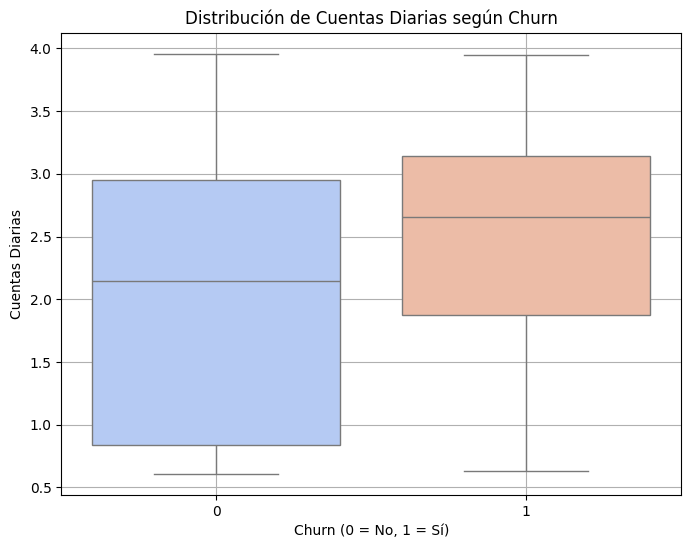

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='cuentas_diarias', data=df, palette='coolwarm')
plt.title("Distribuci√≥n de Cuentas Diarias seg√∫n Churn")
plt.xlabel("Churn (0 = No, 1 = S√≠)")
plt.ylabel("Cuentas Diarias")
plt.grid(True)
plt.show()




 Mediana m√°s alta en churn = 1:indica que los clientes que se dieron de baja tienden a tener cuentas diarias m√°s altas.
Puede sugerir que el costo diario influye en la cancelaci√≥n del servicio.

**2. Correlaci√≥n entre multiples servicios y churn.**

In [ ]:
df.columns.tolist()

['index',
 'churn',
 'seniorcitizen',
 'tenure',
 'charges.monthly',
 'charges.total',
 'cuentas_diarias',
 'internetservice_fiber optic',
 'internetservice_no',
 'contract_one year',
 'contract_two year',
 'paymentmethod_credit card (automatic)',
 'paymentmethod_electronic check',
 'paymentmethod_mailed check',
 'customerID_0003-mknfe',
 'customerID_0004-tlhlj',
 'customerID_0011-igkff',
 'customerID_0013-exchz',
 'customerID_0013-mhzwf',
 'customerID_0013-smeoe',
 'customerID_0014-bmaqu',
 'customerID_0015-uocoj',
 'customerID_0016-qljis',
 'customerID_0017-dinoc',
 'customerID_0017-iudmw',
 'customerID_0018-nyrou',
 'customerID_0019-efaep',
 'customerID_0019-gfntw',
 'customerID_0020-inwck',
 'customerID_0020-jdnxp',
 'customerID_0021-ikxgc',
 'customerID_0022-tcjci',
 'customerID_0023-hghwl',
 'customerID_0023-uyupn',
 'customerID_0023-xuopt',
 'customerID_0027-kwykw',
 'customerID_0030-fnxpp',
 'customerID_0031-pvlzi',
 'customerID_0032-pgels',
 'customerID_0036-ihmot',
 'customer

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Variables con m√∫ltiples categor√≠as a analizar
multi_cat_vars = ['internetservice', 'contract',  'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','contract', 'paymentmethod', 'streamingtv', 'streamingmovies']

# Diccionario para almacenar los resultados
chi2_results = {}

for var in multi_cat_vars:
    contingency_table = pd.crosstab(df[var], df['churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results[var] = -np.log10(p)  # usamos -log10(p) como medida de importancia

# Convertimos a DataFrame y ordenamos
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['-log10(p-value)'])
chi2_df = chi2_df.sort_values(by='-log10(p-value)', ascending=False)

# Visualizaci√≥n
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='-log10(p-value)', y=chi2_df.index, data=chi2_df, palette='coolwarm')
plt.title("Asociaci√≥n entre Variables de Servicios y Churn (Chi-cuadrado)")
plt.xlabel("-log10(p-value)")
plt.ylabel("Variable de Servicio")
plt.tight_layout()
plt.show()


KeyError: 'internetservice'

Variables con barras m√°s largas:

Tienen mayor asociaci√≥n estad√≠stica con churn: contract, onlinesecurity, techsupport.

In [ ]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_flat.describe(include='all')

customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7267  7267   7267    7267.000000    7267       7267   
unique        7267     3      2            NaN       2          2   
top     9995-HOTOH    No   Male            NaN      No         No   
freq             1  5174   3675            NaN    3749       5086   
mean           NaN   NaN    NaN       0.162653     NaN        NaN   
std            NaN   NaN    NaN       0.369074     NaN        NaN   
min            NaN   NaN    NaN       0.000000     NaN        NaN   
25%            NaN   NaN    NaN       0.000000     NaN        NaN   
50%            NaN   NaN    NaN       0.000000     NaN        NaN   
75%            NaN   NaN    NaN       0.000000     NaN        NaN   
max            NaN   NaN    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService  ...  \
count   7267.000000         7267          7267            7267  ...   
unique          NaN            2             3               3  ...   
top             NaN          Yes            No     Fiber optic  ...   
freq            NaN         6560          3495            3198  ...   
mean      32.346498          NaN           NaN             NaN  ...   
std       24.571773          NaN           NaN             NaN  ...   
min        0.000000          NaN           NaN             NaN  ...   
25%        9.000000          NaN           NaN             NaN  ...   
50%       29.000000          NaN           NaN             NaN  ...   
75%       55.000000          NaN           NaN             NaN  ...   
max       72.000000          NaN           NaN             NaN  ...   

       OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
count          7267             7267        7267        7267            7267   
unique            3                3           3           3               3   
top              No               No          No          No              No   
freq           3182             3195        3582        2896            2870   
mean            NaN              NaN         NaN         NaN             NaN   
std             NaN              NaN         NaN         NaN             NaN   
min             NaN              NaN         NaN         NaN             NaN   
25%             NaN              NaN         NaN         NaN             NaN   
50%             NaN              NaN         NaN         NaN             NaN   
75%             NaN              NaN         NaN         NaN             NaN   
max             NaN              NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod Charges.Monthly  \
count             7267             7267              7267     7267.000000   
unique               3                2                 4             NaN   
top     Month-to-month              Yes  Electronic check             NaN   
freq              4005             4311              2445             NaN   
mean               NaN              NaN               NaN       64.720098   
std                NaN              NaN               NaN       30.129572   
min                NaN              NaN               NaN       18.250000   
25%                NaN              NaN               NaN       35.425000   
50%                NaN              NaN               NaN       70.300000   
75%                NaN              NaN               NaN       89.875000   
max                NaN              NaN               NaN      118.750000   

        Charges.Total  
count            7267  
unique           6531  
top              20.2  
freq               11  
mean              NaN  
std               NaN  
min               NaN  
25%               NaN  
50%               NaN  
75%               NaN  
max               NaN  

[11 rows x 21 columns]

#üìÑInforme final

El objetivo del analisis es identificar las razones detr√°s de la alta tasa de churn en Telecom X mediante el an√°lisis de datos y determinar cuales son posibles patrones de comportamiento entre quienes han abandonado a la empresa.
Telecom X, una empresa de telecomunicaciones, est√° experimentando una alta tasa de evasi√≥n de clientes (churn).

**Limpieza y Tratamiento de Datos:**
1. Importaci√≥n de los datos
Se import√≥ un archivo .json desde un repositorio de GitHub o Google Colab.
Se us√≥ pandas.read_json() o pd.read_csv() (seg√∫n el formato transformado) para cargarlo en un DataFrame (df).
2. Estandarizaci√≥n de nombres de columnas
Se renombraron las columnas para facilitar su manipulaci√≥n.
3. Detecci√≥n y tratamiento de valores nulos
Se usaron funciones como df.isnull().sum() y df.info() para identificar columnas con valores nulos
  -En charges.total, los nulos se imputaron o eliminaron tras convertir a num√©rico.
  -En churn, los nulos se eliminaron directamente por ser la variable objetivo.
4. Se convirtieron columnas num√©ricas mal tipadas como charges.total y charges.monthly. Tambi√©n se transform√≥ la variable churn a formato binario.
5. Se cre√≥ la columna cuentas_diarias dividiendo el cargo mensual por 30.
6. Las variables categ√≥ricas con m√°s de 2 opciones fueron transformadas con One-Hot Encoding. Las variables binarias fueron mapeadas con 1 y 0.
7. Eliminaci√≥n de columnas irrelevantes: se elimin√≥ customerID, ya que no aporta informaci√≥n √∫til para modelos predictivos.
8. Normalizaci√≥n / Estandarizaci√≥n de variables num√©ricas: para algunas variables como charges.total, se aplicaron t√©cnicas como Min-Max Scaling o estandarizaci√≥n (opcional seg√∫n el modelo).
9. Verificaci√≥n final: se revisaron nuevamente los tipos de datos y la ausencia de nulos.
**An√°lisis Exploratorio de Datos (EDA):**
1. Distribuci√≥n de la Variable Objetivo: Churn
Gr√°fico: Barplot mostrando la cantidad de clientes que se han ido (churn = 1) y los que se han quedado (churn = 0).
Observaci√≥n: la proporci√≥n de clientes que abandonan es menor que la de los que permanecen.Esto confirma un problema de desbalance de clases.
2. Distribuci√≥n de Cargos Totales (charges.total):
Observaci√≥n:
Distribuci√≥n asim√©trica a la derecha (sesgo positivo).
Algunos valores at√≠picos (outliers) en clientes con cargos muy altos.
Coeficiente de variaci√≥n cercano al 100%, lo que indica alta dispersi√≥n.
3. Relaci√≥n entre charges.total y churn
Observaci√≥n: los clientes que abandonan tienen una mediana de cargos total ligeramente menor. Es posible que muchos se den de baja en etapas tempranas del ciclo de vida.
4. Relaci√≥n entre tenure (tiempo como cliente) y churn: Observaci√≥n: clientes con menor tenure tienden m√°s al churn. Patr√≥n claro: a mayor antig√ºedad, menor probabilidad de darse de baja.
5. Cuentas Diarias (cuentas_diarias) vs Churn: Correlaci√≥n: ~0.19 con churn.
Interpretaci√≥n: clientes que pagan m√°s por d√≠a tienden a permanecer m√°s. Posible relaci√≥n con clientes premium o con m√°s servicios.
6. Correlaci√≥n de Variables Num√©ricas con churn:
Observaci√≥n: tenure, charges.total, cuentas_diarias muestran correlaci√≥n moderada con churn.
Utilizado para seleccionar variables predictoras.
7. Chi-Cuadrado para Variables Categ√≥ricas
Gr√°fico: -log10(p-value) de las pruebas de asociaci√≥n entre variables categ√≥ricas y churn. Observaci√≥n: variables como contract, techsupport, paymentmethod, etc., tienen alta asociaci√≥n. Variables como gender y phoneservice no son significativas.
8. Matriz de Correlaci√≥n Num√©rica: heatmap de correlaci√≥n entre variables num√©ricas. Observaci√≥n: √∫til para detectar colinealidad entre variables (por ejemplo, entre cargos y cuentas diarias). Ninguna correlaci√≥n extremadamente alta que requiera eliminaci√≥n.
**Conclusiones Generales del EDA:**
1. Los clientes con menos antig√ºedad y cargos m√°s bajos tienen mayor tasa de churn.
2. La variable contract es una de las m√°s influyentes categ√≥ricas seg√∫n el an√°lisis Chi-cuadrado.
3. Los patrones de consumo diario (cuentas_diarias) y soporte t√©cnico (techsupport) ayudan a identificar propensi√≥n al churn.
**Conclusiones e Insights del An√°lisis de Churn:**
1. Variables con mayor influencia en el churn
Utilizando m√©todos de correlaci√≥n y prueba Chi-cuadrado, se identifican que algunos servicios y caracter√≠sticas contractuales est√°n fuertemente asociados con la evasi√≥n de clientes:
 - contract: los contratos mensuales tienen una mayor tasa de churn en comparaci√≥n con contratos anuales o bianuales.
 - paperlessbilling: los clientes que usan facturaci√≥n sin papel presentan mayor propensi√≥n a darse de baja.
 - paymentmethod:	m√©todos como Electronic Check se asocian a mayor churn que otros como tarjetas o transferencias autom√°ticas.
 - techsupport, onlinesecurity, onlinebackup:	los clientes que no cuentan con servicios adicionales de soporte o seguridad tienen mayor probabilidad de abandono.
 - internetservice:	el tipo de servicio (por ejemplo, fibra √≥ptica vs DSL) muestra correlaciones con la tasa de churn.
 2. Clientes con m√∫ltiples servicios est√°n m√°s comprometidos. Los clientes que usan m√°s de un servicio (como onlinesecurity, streamingtv, techsupport) muestran menor propensi√≥n al churn. Esto sugiere que aumentar la dependencia del cliente a trav√©s de paquetes de servicios podr√≠a reducir la evasi√≥n.
 3. Factores financieros y comportamiento. El an√°lisis de la variable charges_total mostr√≥: alta dispersi√≥n en los cargos. Clientes con cargos m√°s bajos tienden a abandonar m√°s r√°pido, lo que puede implicar menor uso o fidelizaci√≥n. La variable derivada cuentas_diarias mostr√≥ una correlaci√≥n positiva d√©bil con el churn, pero sugiere que un uso constante diario podr√≠a ser un indicador de retenci√≥n.
 4. Segmentaci√≥n y targeting de retenci√≥n: con estos hallazgos, se pueden tomar acciones estrat√©gicas:
 - Dise√±ar paquetes de servicios combinados. Disminuye el churn al aumentar la dependencia del cliente.
 - Incentivar contratos anuales: los contratos largos reducen la tasa de churn.
 - Revisi√≥n de m√©todos de pago m√°s propensos al abandono, promover m√©todos autom√°ticos o seguros.
 - Ofrecer promociones de onboarding con soporte t√©cnico o respaldo en l√≠nea. Estas variables muestran fuerte relaci√≥n con la retenci√≥n.

**Recomendaciones Estrat√©gicas para Reducir el Churn en TelecomX:**
1. Reformar las opciones de contrato:
 - Problema detectado: Los clientes con contratos mensuales tienen una tasa de evasi√≥n significativamente mayor que aquellos con contratos anuales o bianuales.
  - Recomendaci√≥n: incentivar la migraci√≥n hacia contratos de mayor duraci√≥n mediante descuentos, beneficios exclusivos o meses gratis. Introducir programas de fidelizaci√≥n escalonada, donde a mayor permanencia, mayores beneficios.
2. Promover servicios complementarios:
 - Problema detectado: La falta de servicios como techsupport, onlinesecurity, onlinebackup est√° correlacionada con mayor churn.
  - Recomendaci√≥n: ofrecer paquetes combinados (bundles) que incluyan estos servicios con precios promocionales. Realizar campa√±as educativas sobre el valor de estos servicios, especialmente para clientes nuevos o de bajo compromiso.
3. Optimizar el m√©todo de pago:
 - Problema detectado: El m√©todo de pago electronic check tiene una fuerte asociaci√≥n con mayor tasa de churn.
 - Recomendaci√≥n: fomentar el uso de m√©todos de pago autom√°ticos como tarjeta o d√©bito autom√°tico, mediante bonificaciones o premios. Detectar clientes con m√©todos de pago de alto riesgo y aplicar estrategias de retenci√≥n preventiva (como llamadas, ofertas, encuestas).

4. Reducir el riesgo del Paperless Billing:
 - Problema detectado: La facturaci√≥n sin papel (paperlessbilling) tambi√©n se relaciona con mayor churn.
 - Recomendaci√≥n: revisar el dise√±o, claridad y periodicidad de las facturas electr√≥nicas. Asegurarse de que lleguen de forma efectiva y con opciones visibles para soporte. Considerar volver al papel como opci√≥n gratuita para clientes con bajo engagement digital.
5. Segmentar clientes para retenci√≥n inteligente
 - Estrategia clave: aplicar modelos predictivos (como √°rboles de decisi√≥n) para identificar clientes de alto riesgo de churn. Dise√±ar acciones de retenci√≥n personalizadas por segmento:

a.  Clientes leales: recompensas.

b. Clientes indecisos: promociones.

c. Clientes de alto riesgo: intervenci√≥n directa del equipo de retenci√≥n.

6. Mejorar la experiencia de incorporaci√≥n (onboarding):
 - Oportunidad: Clientes con m√∫ltiples servicios tienden a quedarse m√°s tiempo.
 - Recomendaci√≥n: crear un proceso de onboarding que incentive la contrataci√≥n de m√°s de un servicio desde el inicio. Enviar emails o llamadas de bienvenida con ofertas exclusivas por contrataci√≥n m√∫ltiple.




In [ ]:
df.to_csv("datos_tratados_challengep2.csv", index=False)